## Cost Analysis of Eggs
Dates are from January 1st 2019 to December 31st 2024. Based on grade A Large eggs, both conventionally and organically produced and sold in the United States. The data source is https://marsapi.ams.usda.gov/. 

In [1]:
import os
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the csv file
csv_path = Path("Resources/5_year_eggs.csv")

In [3]:
# Create a dataframe
eggs_df = pd.read_csv(csv_path, low_memory=False)
eggs_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2019,1.554,1.557,1.544,1.463,1.362,1.203,1.243,1.219,1.383,1.282,1.405,1.535
1,2020,1.461,1.449,1.525,2.019,1.640,1.554,1.401,1.328,1.353,1.408,1.450,1.481
2,2021,1.466,1.597,1.625,1.620,1.625,1.642,1.642,1.709,1.835,1.821,1.718,1.788
3,2022,1.929,2.005,2.046,2.520,2.863,2.707,2.936,3.116,2.902,3.419,3.589,4.250
4,2023,4.823,4.211,3.446,3.270,2.666,2.219,2.094,2.043,2.065,2.072,2.138,2.507
5,2024,2.522,2.996,2.992,2.864,2.699,2.715,3.080,3.204,3.821,3.370,3.649,4.146


In [4]:
# Use the Melt function to change the format from wide to long
eggs_monthly = pd.melt(eggs_df, id_vars=["Year"], var_name="Month", value_name="Avg Cost of Eggs")
eggs_monthly.head()

,Year,Month,Avg Cost of Eggs
0,2019,Jan,1.554
1,2020,Jan,1.461
2,2021,Jan,1.466
3,2022,Jan,1.929
4,2023,Jan,4.823


In [5]:
# Combine year and month into 1 field 
eggs_monthly["Year Month"] = pd.to_datetime(eggs_monthly["Year"].astype(str) + '-' + eggs_monthly["Month"], format="%Y-%b")
eggs_monthly = eggs_monthly[["Year Month", "Avg Cost of Eggs"]]
eggs_monthly["Avg Cost of Eggs"] = eggs_monthly["Avg Cost of Eggs"].round(2)
eggs_monthly = eggs_monthly.set_index("Year Month").sort_index(ascending=True)
eggs_monthly.head()

,Avg Cost of Eggs
Year Month,
2019-01-01,1.55
2019-02-01,1.56
2019-03-01,1.54
2019-04-01,1.46
2019-05-01,1.36


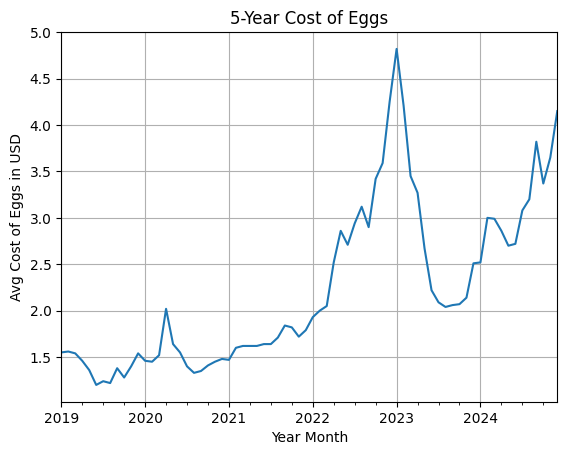

In [6]:
# Create a line graph of the change in cost in eggs over 5 years. 
eggs_monthly.plot(kind="line", y="Avg Cost of Eggs", legend=False)
plt.xlabel("Year Month")
plt.ylabel("Avg Cost of Eggs in USD")
plt.title("5-Year Cost of Eggs")
plt.grid(True)
plt.show()

In [7]:
# transpose and print original dataset for reference
yearly_df = eggs_df.set_index("Year").T
yearly_df

Year,2019,2020,2021,2022,2023,2024
Jan,1.554,1.461,1.466,1.929,4.823,2.522
Feb,1.557,1.449,1.597,2.005,4.211,2.996
Mar,1.544,1.525,1.625,2.046,3.446,2.992
Apr,1.463,2.019,1.620,2.520,3.270,2.864
May,1.362,1.640,1.625,2.863,2.666,2.699
Jun,1.203,1.554,1.642,2.707,2.219,2.715
Jul,1.243,1.401,1.642,2.936,2.094,3.080
Aug,1.219,1.328,1.709,3.116,2.043,3.204
Sep,1.383,1.353,1.835,2.902,2.065,3.821
Oct,1.282,1.408,1.821,3.419,2.072,3.370


In [9]:
# Calculate the weighted average for each year
egg_stats = yearly_df[["2019", "2020", "2021", "2022", "2023", "2024"]]
egg_stats["Weighted Avg"] = eggs_stats["2019"] * len(eggs_stats)
eggs_stats


KeyError: "None of [Index(['2019', '2020', '2021', '2022', '2023', '2024'], dtype='object', name='Year')] are in the [columns]"

In [ ]:
# Calculate the median price per year
median_per_year = eggs_df.median(axis=1).set_axis(eggs_df["Year"])
median_per_year